In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import re
import os

### ----------------------------------------- READ CONFIG FILE -----------------------------------------

In [551]:
config_file = 'Test/config.dat'

# Read the config file
with open(config_file, 'r') as f:
    lines = f.readlines()

# Extract relevant parameters from the config file
for line in lines:
    try:
        if line.startswith('OUTPATH'):
            outpath = line.split('=', 1)[1].split('#')[0].strip()
            outpath = str(outpath)
    except Exception as e:
        print(f"Error parsing OUTPATH: {e}")
    
    try:
        if line.startswith('INPATH'):
            inpath = line.split('=', 1)[1].split('#')[0].strip()
            inpath = str(inpath)
    except Exception as e:
        print(f"Error parsing INPATH: {e}")

    try:
        if line.startswith('RUNPATH'):
            runpath = line.split('=', 1)[1].split('#')[0].strip()
            runpath = str(runpath)
    except Exception as e:
        print(f"Error parsing RUNPATH: {e}")
    
    try:
        if line.startswith('CONSTRAINT'):
            constraint = line.split('=', 1)[1].split('#')[0].strip()
            constraint = str(constraint)
    except Exception as e:
        print(f"Error parsing CONSTRAINT: {e}")

    try:
        if line.startswith('OMEGA'):
            omega = line.split('=', 1)[1].split('#')[0].strip()
            omega = float(omega)
    except Exception as e:
        print(f"Error parsing OMEGA: {e}")
    
    try:
        if line.startswith('LAMBDA'):
            lambdac = line.split('=', 1)[1].split('#')[0].strip()
            lambdac = float(lambdac)
    except Exception as e:
        print(f"Error parsing LAMBDA: {e}")
    
    try:
        if line.startswith('WEOS'):
            weos = line.split('=', 1)[1].split('#')[0].strip()
            weos = float(weos)
    except Exception as e:
        print(f"Error parsing WEOS: {e}")

    try:
        if line.startswith('HUBBLE CONSTANT'):
            h0 = line.split('=', 1)[1].split('#')[0].strip()
            h0 = float(h0)
    except Exception as e:
        print(f"Error parsing HUBBLE CONSTANT: {e}")
    
    try:
        if line.startswith('X_LOW'):
            x_low = line.split('=', 1)[1].split('#')[0].strip()
            x_low = float(x_low)
    except Exception as e:
        print(f"Error parsing X_LOW: {e}")
    
    try:
        if line.startswith('X_UP'):
            x_up = line.split('=', 1)[1].split('#')[0].strip()
            x_up = float(x_up)
    except Exception as e:
        print(f"Error parsing X_UP: {e}")

    try:
        if line.startswith('Y_LOW'):
            y_low = line.split('=', 1)[1].split('#')[0].strip()
            y_low = float(y_low)
    except Exception as e:
        print(f"Error parsing Y_LOW: {e}")
    
    try:
        if line.startswith('Y_UP'):
            y_up = line.split('=', 1)[1].split('#')[0].strip()
            y_up = float(y_up)
    except Exception as e:
        print(f"Error parsing Y_UP: {e}")

    try:
        if line.startswith('EXTEN_PIX'):
            exten_pix = line.split('=', 1)[1].split('#')[0].strip()
            exten_pix = float(exten_pix)
    except Exception as e:
        print(f"Error parsing EXTEN_PIX: {e}")
    
    try:
        if line.startswith('POINT_PIX'):
            point_pix = line.split('=', 1)[1].split('#')[0].strip()
            point_pix = float(point_pix)
    except Exception as e:
        print(f"Error parsing POINT_PIX: {e}")

    try:
        if line.startswith('MAXLEV'):
            maxlev = line.split('=', 1)[1].split('#')[0].strip()
            maxlev = str(maxlev)
    except Exception as e:
        print(f"Error parsing MAXLEV: {e}")

    try:
        if line.startswith('CHI2_PLANE'):
            chi2_plane = line.split('=', 1)[1].split('#')[0].strip()
            chi2_plane = str(chi2_plane)
    except Exception as e:
        print(f"Error parsing CHI2_PLANE: {e}")
    
    try:
        if line.startswith('USEMAG'):
            usemag = line.split('=', 1)[1].split('#')[0].strip()
            usemag = int(usemag)
    except Exception as e:
        print(f"Error parsing USEMAG: {e}")

    try:
        if line.startswith('VARYH0'):
            varyh0 = line.split('=', 1)[1].split('#')[0].strip()
            varyh0 = int(varyh0)
    except Exception as e:
        print(f"Error parsing VARYH0: {e}")
    
    try:
        if line.startswith('READOBS'):
            readobs = line.split('=', 1)[1].split('#')[0].strip()
            readobs = str(readobs)
    except Exception as e:
        print(f"Error parsing READOBS: {e}")
    
    try:
        if line.startswith('OPTIMIZE'):
            optimize = line.split('=', 1)[1].split('#')[0].strip()
            optimize = int(optimize)
    except Exception as e:
        print(f"Error parsing OPTIMIZE: {e}")
    
    try:
        if line.startswith('FINDIMG'):
            findimg = line.split('=', 1)[1].split('#')[0].strip()
            findimg = int(findimg)
    except Exception as e:
        print(f"Error parsing FINDIMG: {e}")
    
    try:
        if line.startswith('WRITECRIT'):
            writecrit = line.split('=', 1)[1].split('#')[0].strip()
            writecrit = int(writecrit)
    except Exception as e:
        print(f"Error parsing WRITECRIT: {e}")
    
    try:
        if line.startswith('WRITELENS'):
            writelens = line.split('=', 1)[1].split('#')[0].strip()
            writelens = int(writelens)
    except Exception as e:
        print(f"Error parsing WRITELENS: {e}")

    try:
        if line.startswith('PRIOR'):
            prior = line.split('=', 1)[1].split('#')[0].strip()
            prior = int(prior)
    except Exception as e:
        print(f"Error parsing PRIOR: {e}")

    try:
        if line.startswith('MODEL'):
            basemodel = line.split('=', 1)[1].split('#')[0].strip()
            basemodel = str(basemodel)
    except Exception as e:
        print(f"Error parsing MODEL: {e}")
    
    try:
        if line.startswith('INIT_PARAM'):
            init_param = line.split('=', 1)[1].split('#')[0].strip()
            init_param = str(init_param)
    except Exception as e:
        print(f"Error parsing INIT_PARAM: {e}")
    
    try:
        if line.startswith('ZL'):
            zl = line.split('=', 1)[1].split('#')[0].strip()
            zl = float(zl)
    except Exception as e:
        print(f"Error parsing ZL: {e}")

print(f"Using outpath: {outpath}")
print(f"Using inpath: {inpath}")
print(f"Using constraint: {constraint}")
print(f"Using omega: {omega}")
print(f"Using lambda: {lambdac}")
print(f"Using weos: {weos}")
print(f"Using Hubble constant: {h0}")
print(f"Using x_low: {x_low}")
print(f"Using x_up: {x_up}")
print(f"Using y_low: {y_low}")
print(f"Using y_up: {y_up}")
print(f"Using exten_pix: {exten_pix}")
print(f"Using point_pix: {point_pix}")
print(f"Using maxlev: {maxlev}")
print(f"Using chi2_plane: {chi2_plane}")
print(f"Using varyh0: {varyh0}")
print(f"Using usemag: {usemag}")
print(f"Using readobs: {readobs}")
print(f"Using optimize: {optimize}")
print(f"Using findimg: {findimg}")
print(f"Using writecrit: {writecrit}")
print(f"Using writelens: {writelens}")
print(f"Using model: {basemodel}")
print(f"Using init_param: {init_param}")
print(f"Using zl: {zl}")
print("Config file read successfully.")

Using outpath: Output
Using inpath: Input
Using constraint: pos+flux
Using omega: 0.3
Using lambda: 0.7
Using weos: -1.0
Using Hubble constant: 0.7
Using x_low: -3.5
Using x_up: 3.5
Using y_low: -3.5
Using y_up: 3.5
Using exten_pix: 0.01
Using point_pix: 0.01
Using maxlev: 1
Using chi2_plane: 1
Using varyh0: 0
Using usemag: 0
Using readobs: input.dat
Using optimize: 1
Using findimg: 1
Using writecrit: 1
Using writelens: 1
Using model: POW+SHEAR
Using init_param: 'Random'
Using zl: 0.23
Config file read successfully.


### --------------------------------------------- OBS POINT ---------------------------------------------

In [552]:
# Obs Point File Reading
obs_columns = ['x', 'y', 'mag', 'pos_err', 'mag_err', 'td', 'td_err', 'parity']
first_row_columns = ['id', 'n_img', 'zs', 'zs_err']
obs_point = pd.read_csv(f'{inpath}/obs_point+flux.dat', skiprows=1, header=None, names=obs_columns, delim_whitespace=True)
first_row = pd.read_csv(f'{inpath}/obs_point+flux.dat', nrows=1, header=None, names=first_row_columns, delim_whitespace=True)

In [553]:
n_img = first_row['n_img'][0]
zs = first_row['zs'][0]
zs_err = first_row['zs_err'][0]

In [554]:
# Assigning Names to the Images
# Find brightest image
brightest_index = obs_point['mag'].idxmax()
obs_point.at[brightest_index, 'Img'] = 'A'

# Clockwise assignment of names from Img A 
def assign_image_names(df, start_index):
    names = ['A', 'B', 'C', 'D']
    current_name_index = 0
    current_index = start_index
    assigned_indices = {current_index}
    
    while len(assigned_indices) < len(df):
        current_x, current_y = df.at[current_index, 'x'], df.at[current_index, 'y']
        next_index = None
        max_angle = -float('inf')
        
        for i in range(len(df)):
            if i in assigned_indices:
                continue
            dx = df.at[i, 'x'] - current_x
            dy = df.at[i, 'y'] - current_y
            angle = np.arctan2(dy, dx)
            if angle > max_angle:
                max_angle = angle
                next_index = i
        
        if next_index is not None:
            current_name_index += 1
            df.at[next_index, 'Img'] = names[current_name_index]
            assigned_indices.add(next_index)
            current_index = next_index

assign_image_names(obs_point, brightest_index)


In [555]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C
1,0.832,-1.220,1.00,0.005,0.02,0.0,0.0,0,A
2,-0.686,-1.191,0.79,0.005,0.02,0.0,0.0,0,B
3,0.706,0.869,0.39,0.005,0.01,0.0,0.0,0,D


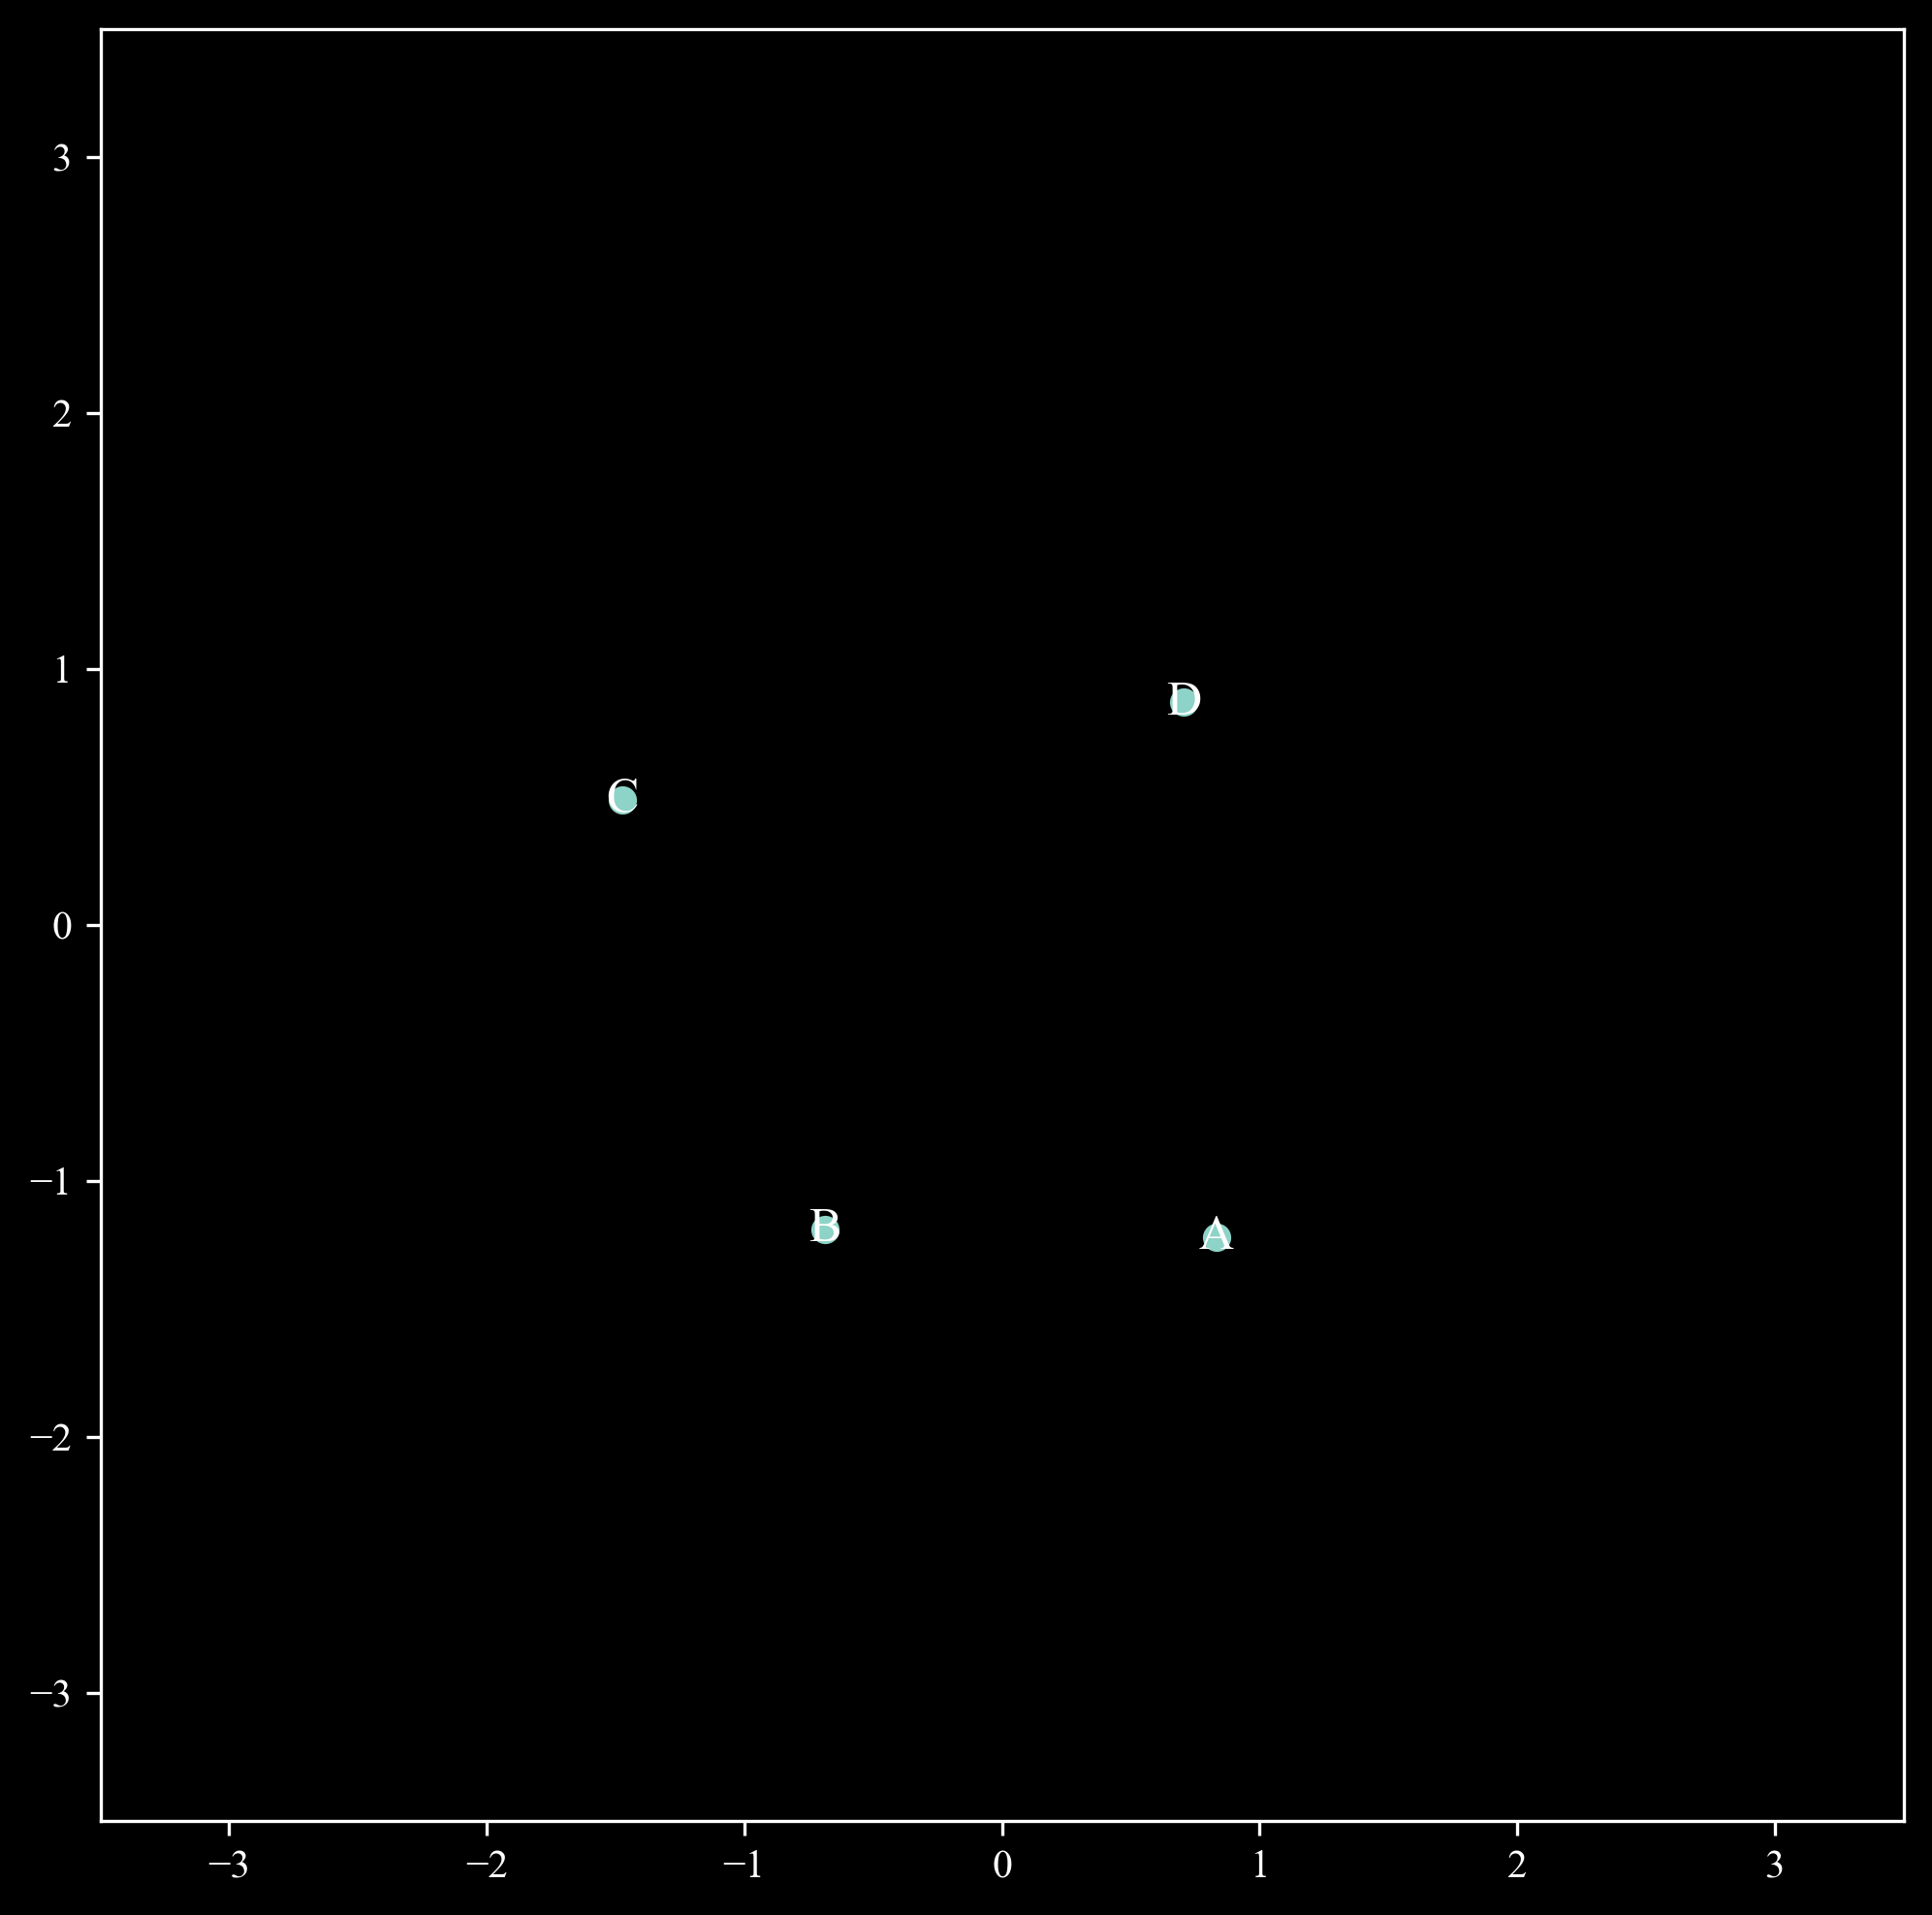

In [556]:
plt.figure(figsize=(8, 8))
plt.scatter(obs_point['x'], obs_point['y'])
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
for i, row in obs_point.iterrows():
    plt.text(row['x'], row['y'], row['Img'], fontsize=12, ha='center', va='center')

In [557]:
df = pd.DataFrame(0, columns=obs_columns, index=range(int(first_row.at[0, 'n_img'])))
df

,x,y,mag,pos_err,mag_err,td,td_err,parity
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0


In [558]:
# Generate the obs_point.dat file

# Building the file
with open(f'{runpath}/input.dat', 'w') as f:
    f.write(f"{first_row.at[0, 'id']} {first_row.at[0, 'n_img']} {first_row.at[0, 'zs']} {first_row.at[0, 'zs_err']}\n")

    df = pd.DataFrame(0, columns=obs_columns, index=range(int(first_row.at[0, 'n_img'])))

    if 'pos' in constraint:
        df['x'] = obs_point['x']
        df['y'] = obs_point['y']
        df['pos_err'] = obs_point['pos_err']
    
    if 'flux' in constraint:
        df['mag'] = obs_point['mag']
        df['mag_err'] = obs_point['mag_err']

    if 'td' in constraint:
        df['td'] = obs_point['td']
        df['td_err'] = obs_point['td_err']
    
    if 'parity' in constraint:
        df['parity'] = obs_point['parity']
    
    f.write(df.to_string(header=False, index=False))
    
    # Save the file 
    print(f"File '{inpath}/input.dat' generated successfully.")

File 'Input/input.dat' generated successfully.


### --------------------------------------- INITIAL GUESS GENERATION+READING ---------------------------------------

In [559]:
# Define the lens corresponding parameters (order preserved)
# POW
pow_params = ['$z_{s,fid}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{Ein}$', '$\gamma$ (PWI)']

# SIE
sie_params = ['$\sigma$', 'x', 'y', 'e', '$θ_{e}$', '$r_{core}$', 'NaN']

# NFW
nfw_params = ['M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', 'NaN']

# EIN
ein_params = ['M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', r'$\alpha_{e}$']

# SHEAR 
shear_params = ['$z_{s,fid}$', 'x', 'y', '$\gamma$', '$θ_{\gamma}$', 'NaN', '$\kappa$']

# Sersic
sersic_params = ['$M_{tot}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{e}$', '$n$']

# MPOLE 
mpole_params = ['$z_{s,fid}$', 'x', 'y', '$\eta$', '$\\theta_{m}$', 'm', 'n']

model_list = ['POW', 'SIE', 'ANFW', 'EIN', 'PERT', 'SERS', 'MPOLE']
model_params = {
    'POW': pow_params,
    'SIE': sie_params,
    'ANFW': nfw_params,
    'EIN': ein_params,
    'PERT': shear_params,
    'SERS': sersic_params,
    'MPOLE': mpole_params
}


In [560]:
models = basemodel.split('+') 
models

['POW', 'SHEAR']

In [561]:
number_of_lenses = len(models)
print(f"Number of lenses detected: {number_of_lenses}")

if init_param.strip("'\"") == 'Manual':

    with open('{inpath}/init_param.dat', 'w') as f:
        f.write('# Mode: Manual\n')
        f.write('\n')
        for model in models:
            model = model.strip()
            if model in model_params:
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess:                                                                                                         ')
                f.write('\n')
                f.write(f'Flags:                                                                                                         ')
                f.write('\n\n')
            elif model == 'SHEAR':
                model = 'PERT'
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess:                                                                                                         ')
                f.write('\n')
                f.write(f'Flags:                                                                                                         ')
                f.write('\n\n')
            else:
                print(f"Warning: Model '{model}' not recognized. Skipping.\n")
        f.write('# Parameter Initial Guesses for Source:\n')
        f.write('       $z_{s,fid}$       x       y\n')
        f.write('Guess:                                                                                                         \n')
        f.write('Flags:                                                                                                         \n\n')
    
    print(f"File '{inpath}/init_param.dat' generated successfully.")


Number of lenses detected: 2


In [562]:
# Automatic Parameter Generation

def ell_gen():
    e = np.random.uniform(0.0, 0.7)
    return e

def pa_gen():
    pa = np.random.uniform(0.0, 360)
    return pa

def r_ein_gen():
    r_ein = np.random.uniform(0.1, 2.0)
    return r_ein

def pwi_gen():
    pwi = np.random.uniform(1.5, 2.5)
    return pwi

def sigma_gen():
    sigma = np.random.uniform(120, 220)
    return sigma

def r_core_gen():
    r_core = np.random.uniform(0.0, 0.5)
    return r_core

def M_gen():
    M = np.random.uniform(1e10, 1e13)
    return M

def c_gen():
    c = np.random.uniform(30, 90)
    return c

def alpha_e_gen():
    alpha_e = np.random.uniform(1.0, 3.0)
    return alpha_e

def gamma_gen():
    gamma = np.random.uniform(0.0, 0.1)
    return gamma

def kappa_gen():
    kappa = np.random.uniform(0.0, 0.6)
    return kappa

def eta_gen():
    eta = np.random.uniform(0.0, 0.1)
    return eta

def m_gen():
    m = np.random.randint(2, 6)
    return m

def n_gen():
    n = np.random.uniform(1.5, 2.5)
    return n

def nan_gen():
    nan_gen = 0
    return nan_gen


In [563]:
# Reading the init_params file 
init_file = f'{runpath}/init_param.dat'

if init_param.strip("'\"") == 'Manual':
    # Read the Init Params file
    with open(init_file, 'r') as f:
        lines = f.readlines()

    initial_guesses = []
    param_flags = []

    # Extract relevant parameters from the config file
    for line in lines:
        try:
            if line.startswith('Guess'):
                guess = line.split(':', 1)[1].split()
                initial_guesses.append(guess)
        except Exception as e:
            print(f"Error parsing GUESS: {e}")

    for line in lines:
        try:
            if line.startswith('Flags'):
                flags = line.split(':', 1)[1].split()
                param_flags.append(flags)
        except Exception as e:
            print(f"Error parsing FLAGS: {e}")
            
elif init_param.strip("'\"") == 'Random':
    print("Using Random Initial Parameters")

    random_params = []

    param1 = zl # Always the lens redshift
    param3 = (x_low + x_up) / 2 # x position
    param4 = (y_low + y_up) / 2 # y position

    for model in models:
        model = model.strip()
        if model == 'POW':
            param2 = zs
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = r_ein_gen()
            param8 = pwi_gen()
        elif model == 'SIE':
            param2 = sigma_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = nan_gen() # CORED SIE IGNORED
            param8 = nan_gen()
        elif model == 'NFW':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = c_gen()
            param8 = nan_gen()
        elif model == 'EIN':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = c_gen()
            param8 = alpha_e_gen()
        elif model == 'SHEAR' or model == 'PERT':
            param2 = zs
            param5 = gamma_gen()
            param6 = pa_gen()
            param7 = nan_gen()
            param8 = kappa_gen()
        elif model == 'SERS':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = r_ein_gen()
            param8 = nan_gen()
        elif model == 'MPOLE':
            param2 = zs
            param5 = eta_gen()
            param6 = pa_gen()
            param7 = m_gen()
            param8 = n_gen()

        else:
            print(f"Warning: Model '{model}' not recognized. Skipping.\n")

        random_params.append([param1, param2, param3, param4, param5, param6, param7, param8])

    # Source Parameters
    param9 = zs
    param10 = (x_low + x_up) / 2
    param11 = (y_low + y_up) / 2
    random_params.append([param9, param10, param11])

    initial_guesses = random_params
    param_flags = [['1'] * len(guess) for guess in random_params]

    with open(f'{runpath}/init_param.dat', 'w') as f:
        f.write('# Mode: Random\n')
        f.write('\n')
        for i, model in enumerate(models):
            model = model.strip()
            if model in model_params:
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess: {"       ".join(map(str, initial_guesses[i]))}\n')
                f.write(f'Flags: {"       ".join(param_flags[i])}\n\n')
            elif model == 'SHEAR':
                model = 'PERT'
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess: {"       ".join(map(str, initial_guesses[i]))}\n')
                f.write(f'Flags: {"       ".join(param_flags[i])}\n\n')
            else:
                print(f"Warning: Model '{model}' not recognized. Skipping.\n")
        f.write('# Parameter Initial Guesses for Source:\n')
        f.write('       $z_{s,fid}$       x       y\n')
        f.write(f'Guess: {"       ".join(map(str, initial_guesses[-1]))}\n')
        f.write(f'Flags: {"       ".join(param_flags[-1])}\n\n')

for i in range(len(initial_guesses)):
    initial_guesses[i] = [str(x) for x in initial_guesses[i]]


Using Random Initial Parameters


In [564]:
param_flags

[['1', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1']]

In [565]:
initial_guesses

[['0.23',
  '0.777',
  '0.0',
  '0.0',
  '0.4931974488816667',
  '62.761471839079334',
  '0.37552165905934554',
  '2.3023306939988863'],
 ['0.23',
  '0.777',
  '0.0',
  '0.0',
  '0.09419195217998094',
  '76.74100170404346',
  '0',
  '0.1775964745895581'],
 ['0.777', '0.0', '0.0']]

### --------------------------------------- PYTHON FILE GENERATION ---------------------------------------

In [566]:
save_path = outpath + '/' + str(basemodel)
print(save_path)

Output/POW+SHEAR


In [567]:
with open(f'{runpath}/model.py', 'w') as f:
    f.write("import glafic\n\n")
    f.write(f"glafic.init({omega}, {lambdac}, {weos}, {h0}, '{save_path}', {x_low}, {y_low}, {x_up}, {y_up}, {exten_pix}, {point_pix}, {maxlev}, verb=0)\n\n")
    f.write(f"glafic.set_secondary('chi2_splane {chi2_plane}', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_checknimg 0', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_restart -1', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_usemag {usemag}', verb=0)\n")
    if varyh0 == 1:
        f.write(f"glafic.set_secondary('hvary 1', verb=0)\n")
    else:
        f.write(f"glafic.set_secondary('hvary 0', verb=0)\n")
    for model in models:
        if model == 'NFW' or model == 'EIN' or model == 'ANFW':
            print("NFW detected, setting flag_hodensity to 2")
            f.write(f"glafic.set_secondary('flag_hodensity 2', verb=0)\n")
    f.write(f"glafic.set_secondary('ran_seed -122000', verb=0)\n\n")
    f.write(f"glafic.startup_setnum({number_of_lenses}, 0, 1)\n")
    for i in range(number_of_lenses):
        if models[i] == 'SHEAR':
            models[i] = 'PERT'
        if models[i]  == 'NFW':
            models[i] = 'ANFW'
        f.write(f"glafic.set_lens({i+1}, '{models[i].lower()}', " + ', '.join(initial_guesses[i]) + ")\n")
        f.write(f"glafic.setopt_lens({i+1}, " + ', '.join(param_flags[i]) + ")\n\n")
    f.write(f"glafic.set_point(1, " + ', '.join(initial_guesses[-1]) + ")\n")
    f.write(f"glafic.setopt_point(1, " + ', '.join(param_flags[-1]) + ")\n\n")
    f.write(f"glafic.model_init(verb=0)\n\n")
    f.write(f"glafic.readobs_point('{runpath}/{readobs}')\n")
    if prior == 1:
        f.write(f"glafic.parprior({inpath}/prior.dat)\n")
    if optimize == 1:
        f.write(f"glafic.optimize()\n")
    if findimg == 1:
        f.write(f"glafic.findimg()\n")
    if writecrit == 1:
        f.write(f"glafic.writecrit({zs})\n")
    if writelens == 1:
        f.write(f"glafic.writelens({zs})\n")
    f.write(f"\n")
    f.write(f"glafic.quit()\n")
    print(f"File '{runpath}/model.py' generated successfully.")

File 'Run/model.py' generated successfully.


### --------------------------------------- READING OUTPUT FILES ---------------------------------------

In [568]:
opt_file = save_path + '_optresult.dat'
crit_file = save_path + '_crit.dat'
lens_file = save_path + '_lens.fits'
point_file = save_path + '_point.dat'

def calculate_distance(row1, row2):
    return np.sqrt((row1['x'] - row2['x'])**2 + (row1['y'] - row2['y'])**2)

# Reading the files
if findimg == 1:
    try:
        pred_point = pd.read_csv(point_file, skiprows=1, header=None, delim_whitespace=True, names=['x', 'y', 'mag', 'td'])
        num_pred_images = len(pred_point)

        if num_pred_images > n_img:
            print(f"Warning: Number of predicted images ({num_pred_images}) exceeds number of observed images ({n_img}).")
            print("Automatic matching of images\n")

            # Matching predicted images to observed images based on proximity
            distance_matrix = np.zeros((n_img, num_pred_images))
            for i in range(n_img):
                for j in range(num_pred_images):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])

            # The lowest n_img distances will be considered matches
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == n_img:
                    break
            
            # Perform row switching such that all matches are in order of observed images
            matches.sort(key=lambda x: x[0])

            # Keep only matched predicted images
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)

            pred_point['Img'] = obs_point['Img'].values
        
        if num_pred_images < n_img:
            print(f"Warning: Number of predicted images ({num_pred_images}) is less than number of observed images ({n_img}).")

            # Matching predicted images to observed images based on proximity
            distance_matrix = np.zeros((n_img, num_pred_images))
            for i in range(n_img):
                for j in range(num_pred_images):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])
            
            # The lowest num_pred_images distances will be considered matches
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == num_pred_images:
                    break
            
            # Assign names to matched predicted images
            matches.sort(key=lambda x: x[0])
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)
            pred_point['Img'] = [obs_point.at[obs_idx, 'Img'] for obs_idx, _ in matches]

        if num_pred_images == n_img:
            
            # Directly assign names based on proximity
            distance_matrix = np.zeros((n_img, n_img))
            for i in range(n_img):
                for j in range(n_img):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])
            
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == n_img:
                    break
            matches.sort(key=lambda x: x[0])
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)
            pred_point['Img'] = [obs_point.at[obs_idx, 'Img'] for obs_idx, _ in matches]


    except Exception as e:
        print(f"Error reading predicted point file: {e}")

In [569]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C
1,0.832,-1.220,1.00,0.005,0.02,0.0,0.0,0,A
2,-0.686,-1.191,0.79,0.005,0.02,0.0,0.0,0,B
3,0.706,0.869,0.39,0.005,0.01,0.0,0.0,0,D


In [570]:
pred_point

,x,y,mag,td,Img
0,-1.4721,0.4885,2.5722,0.000,C
1,0.8333,-1.2209,3.1052,5.207,A
2,-0.6873,-1.1914,-2.4172,10.931,B
3,0.7042,0.8697,-1.1598,26.331,D


In [571]:
# Reading Critical and Caustics
if writecrit == 1:
    try:
        crit_data = pd.read_csv(crit_file, header=None, delim_whitespace=True, names=['xi_1', 'yi_1', 'xs_1', 'ys_1', 'x1i_2', 'yi_2', 'xs_2', 'ys_2'])
    except Exception as e:
        print(f"Error reading critical file: {e}")

In [572]:
# Reading the FITS file 
if writelens == 1:
    try:
        lens_hdu = fits.open(lens_file)
        lens_data = lens_hdu[0].data
        lens_header = lens_hdu[0].header
        lens_hdu.close()

        alpha_x = lens_data[0]
        alpha_y = lens_data[1]
        td = lens_data[2]
        kappa = lens_data[3]
        gamma1 = lens_data[4]
        gamma2 = lens_data[5]
        mu_invert = lens_data[6]
        rotation = lens_data[7]
    except Exception as e:
        print(f"Error reading lens FITS file: {e}")

In [573]:
# Reading the optimization results
if optimize == 1:
    try:
        with open(opt_file, 'r') as file:
            opt_result = file.readlines()

        last_optimize_index = None
        for idx in range(len(opt_result) - 1, -1, -1):
            if 'optimize' in opt_result[idx]:
                last_optimize_index = idx
                break
        if last_optimize_index is None:
            raise ValueError("No line with 'optimize' found in the file.")

        opt_result = opt_result[last_optimize_index + 1:]

        lens_params_dict = {}
        lens_params = []
        for line in opt_result:
            if line.startswith('lens'):
                parts = re.split(r'\s+', line.strip())
                lens_name = parts[1]
                params = [float(x) for x in parts[2:]]
                lens_params_dict[lens_name] = params
                lens_params.append((lens_name, params))
        if lens_params:
            for i in range(len(lens_params)):
                lens_name, params = lens_params[i]
                lens_params_dict[lens_name] = params[1:]

        source_params = []
        for line in opt_result:
            if line.startswith('point'):
                parts = re.split(r'\s+', line.strip())
                params = [float(x) for x in parts[1:]]
                source_params.append(params)
        
        chi2_line = next((line for line in opt_result if 'chi^2' in line), None)
        if chi2_line is None:
            raise ValueError("No line with 'chi2' found in the file.")
        chi2_value = float(chi2_line.split('=')[-1].strip().split()[0])
        num_lens_profiles = len(lens_params_dict)

        if varyh0 == 1:
            hubble = next((line for line in opt_result if 'hubble =' in line), None)
            hubble = hubble.split('=')[-1].strip().split()[0]
        
        df = pd.DataFrame()
        rows = []
        max_param_len = 0
        for lens_name, params in lens_params_dict.items():
            row = {'Lens Name': lens_name}
            for i, val in enumerate(params): row[f'param{i+1}'] = val
            rows.append(row)
            if len(params) > max_param_len: max_param_len = len(params)
        columns = ['Lens Name'] + [f'param{i+1}' for i in range(max_param_len)]
        df = pd.DataFrame(rows, columns=columns)
    except Exception as e:
        print(f"Error reading optimization results file: {e}")

### ------------------------------ PLOTTING --------------------------------

In [574]:
# Preprocessing for Plotting
# Assigning Colours 
obs_point['Color'] = ['blue', 'orange', 'green', 'pink']
pred_point['Color'] = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple'][0:len(pred_point)]

# Calculating RMS
num_obs_point = len(obs_point)
num_pred_point = len(pred_point)

if num_obs_point == num_pred_point:
    image_rms = []
    for i in range(num_obs_point):
        dist = np.sqrt((obs_point.at[i, 'x'] - pred_point.at[i, 'x'])**2 + (obs_point.at[i, 'y'] - pred_point.at[i, 'y'])**2)
        image_rms.append(dist)
        pos_rms = np.sqrt(np.sum(np.array(image_rms)**2) / num_obs_point)
    pred_point['pos_rms'] = image_rms
    print(f"Position RMS: {pos_rms}")
    print(f"Image-wise Position RMS: {image_rms}")
elif num_obs_point > num_pred_point:
    image_rms = []
    for i in range(num_pred_point):
        obs_row = obs_point[obs_point['Img'] == pred_point.at[i, 'Img']].iloc[0]
        dist = np.sqrt((obs_row['x'] - pred_point.at[i, 'x'])**2 + (obs_row['y'] - pred_point.at[i, 'y'])**2)
        image_rms.append(dist)
        pos_rms = np.sqrt(np.sum(np.array(image_rms)**2) / num_pred_point)
    pred_point['pos_rms'] = image_rms
    print(f"Position RMS (based on predicted images): {pos_rms}")
    print(f"Image-wise Position RMS: {image_rms}")
                      

# Order according to Img names
obs_point = obs_point.sort_values(by='Img').reset_index(drop=True)
pred_point = pred_point.sort_values(by='Img').reset_index(drop=True)

Position RMS: 0.001727715254317106
Image-wise Position RMS: [0.0019646882704388623, 0.0015811388300843244, 0.0013601470508735006, 0.0019313207915827276]


In [575]:
pred_point

,x,y,mag,td,Img,Color,pos_rms
0,0.8333,-1.2209,3.1052,5.207,A,tab:orange,0.001581
1,-0.6873,-1.1914,-2.4172,10.931,B,tab:green,0.001360
2,-1.4721,0.4885,2.5722,0.000,C,tab:blue,0.001965
3,0.7042,0.8697,-1.1598,26.331,D,tab:purple,0.001931


In [ ]:
def plotting(obs_point, pred_point, bkg = 'white'):
    if bkg == 'black':
        plt.style.use('dark_background')
        plt.rcParams["font.family"] = "Times New Roman" 
        plt.rcParams["figure.dpi"] = 300
        plt.rcParams.update({'axes.facecolor':'black', 'figure.facecolor':'black'})
    else:
        plt.style.use('default')
        plt.rcParams["font.family"] = "Times New Roman" 
        plt.rcParams["figure.dpi"] = 300
        plt.rcParams.update({'axes.facecolor':'white', 'figure.facecolor':'white'})

    
    # Plotting for POS
    plt.figure(figsize=(8, 8))
    bar_width = 0.5
    bar_container = plt.bar(pred_point['Img'], pred_point['pos_rms'], color=pred_point['Color'], width=bar_width)
    ax = plt.gca()

    for i, bar_patch in enumerate(bar_container.patches):
        ax_left, ax_right = ax.get_xlim()
        ax_width = ax_right - ax_left
        bar_left = bar_patch.get_x()
        bar_right = bar_left + bar_patch.get_width()
        xmin_rel = (bar_left - ax_left) / ax_width
        xmax_rel = (bar_right - ax_left) / ax_width

        plt.axhline(y=obs_point['pos_err'].iloc[i], 
                    xmin=xmin_rel, 
                    xmax=xmax_rel, 
                    color='r', 
                    linestyle='--', 
                    linewidth=2, 
                    label='$1 \sigma$' if i == 0 else "")

    plt.xlabel('Image')
    plt.ylabel('Position Offset')
    plt.legend()
    plt.title('Position RMS = {:.4f}"'.format(pos_rms))
    plt.show()
        

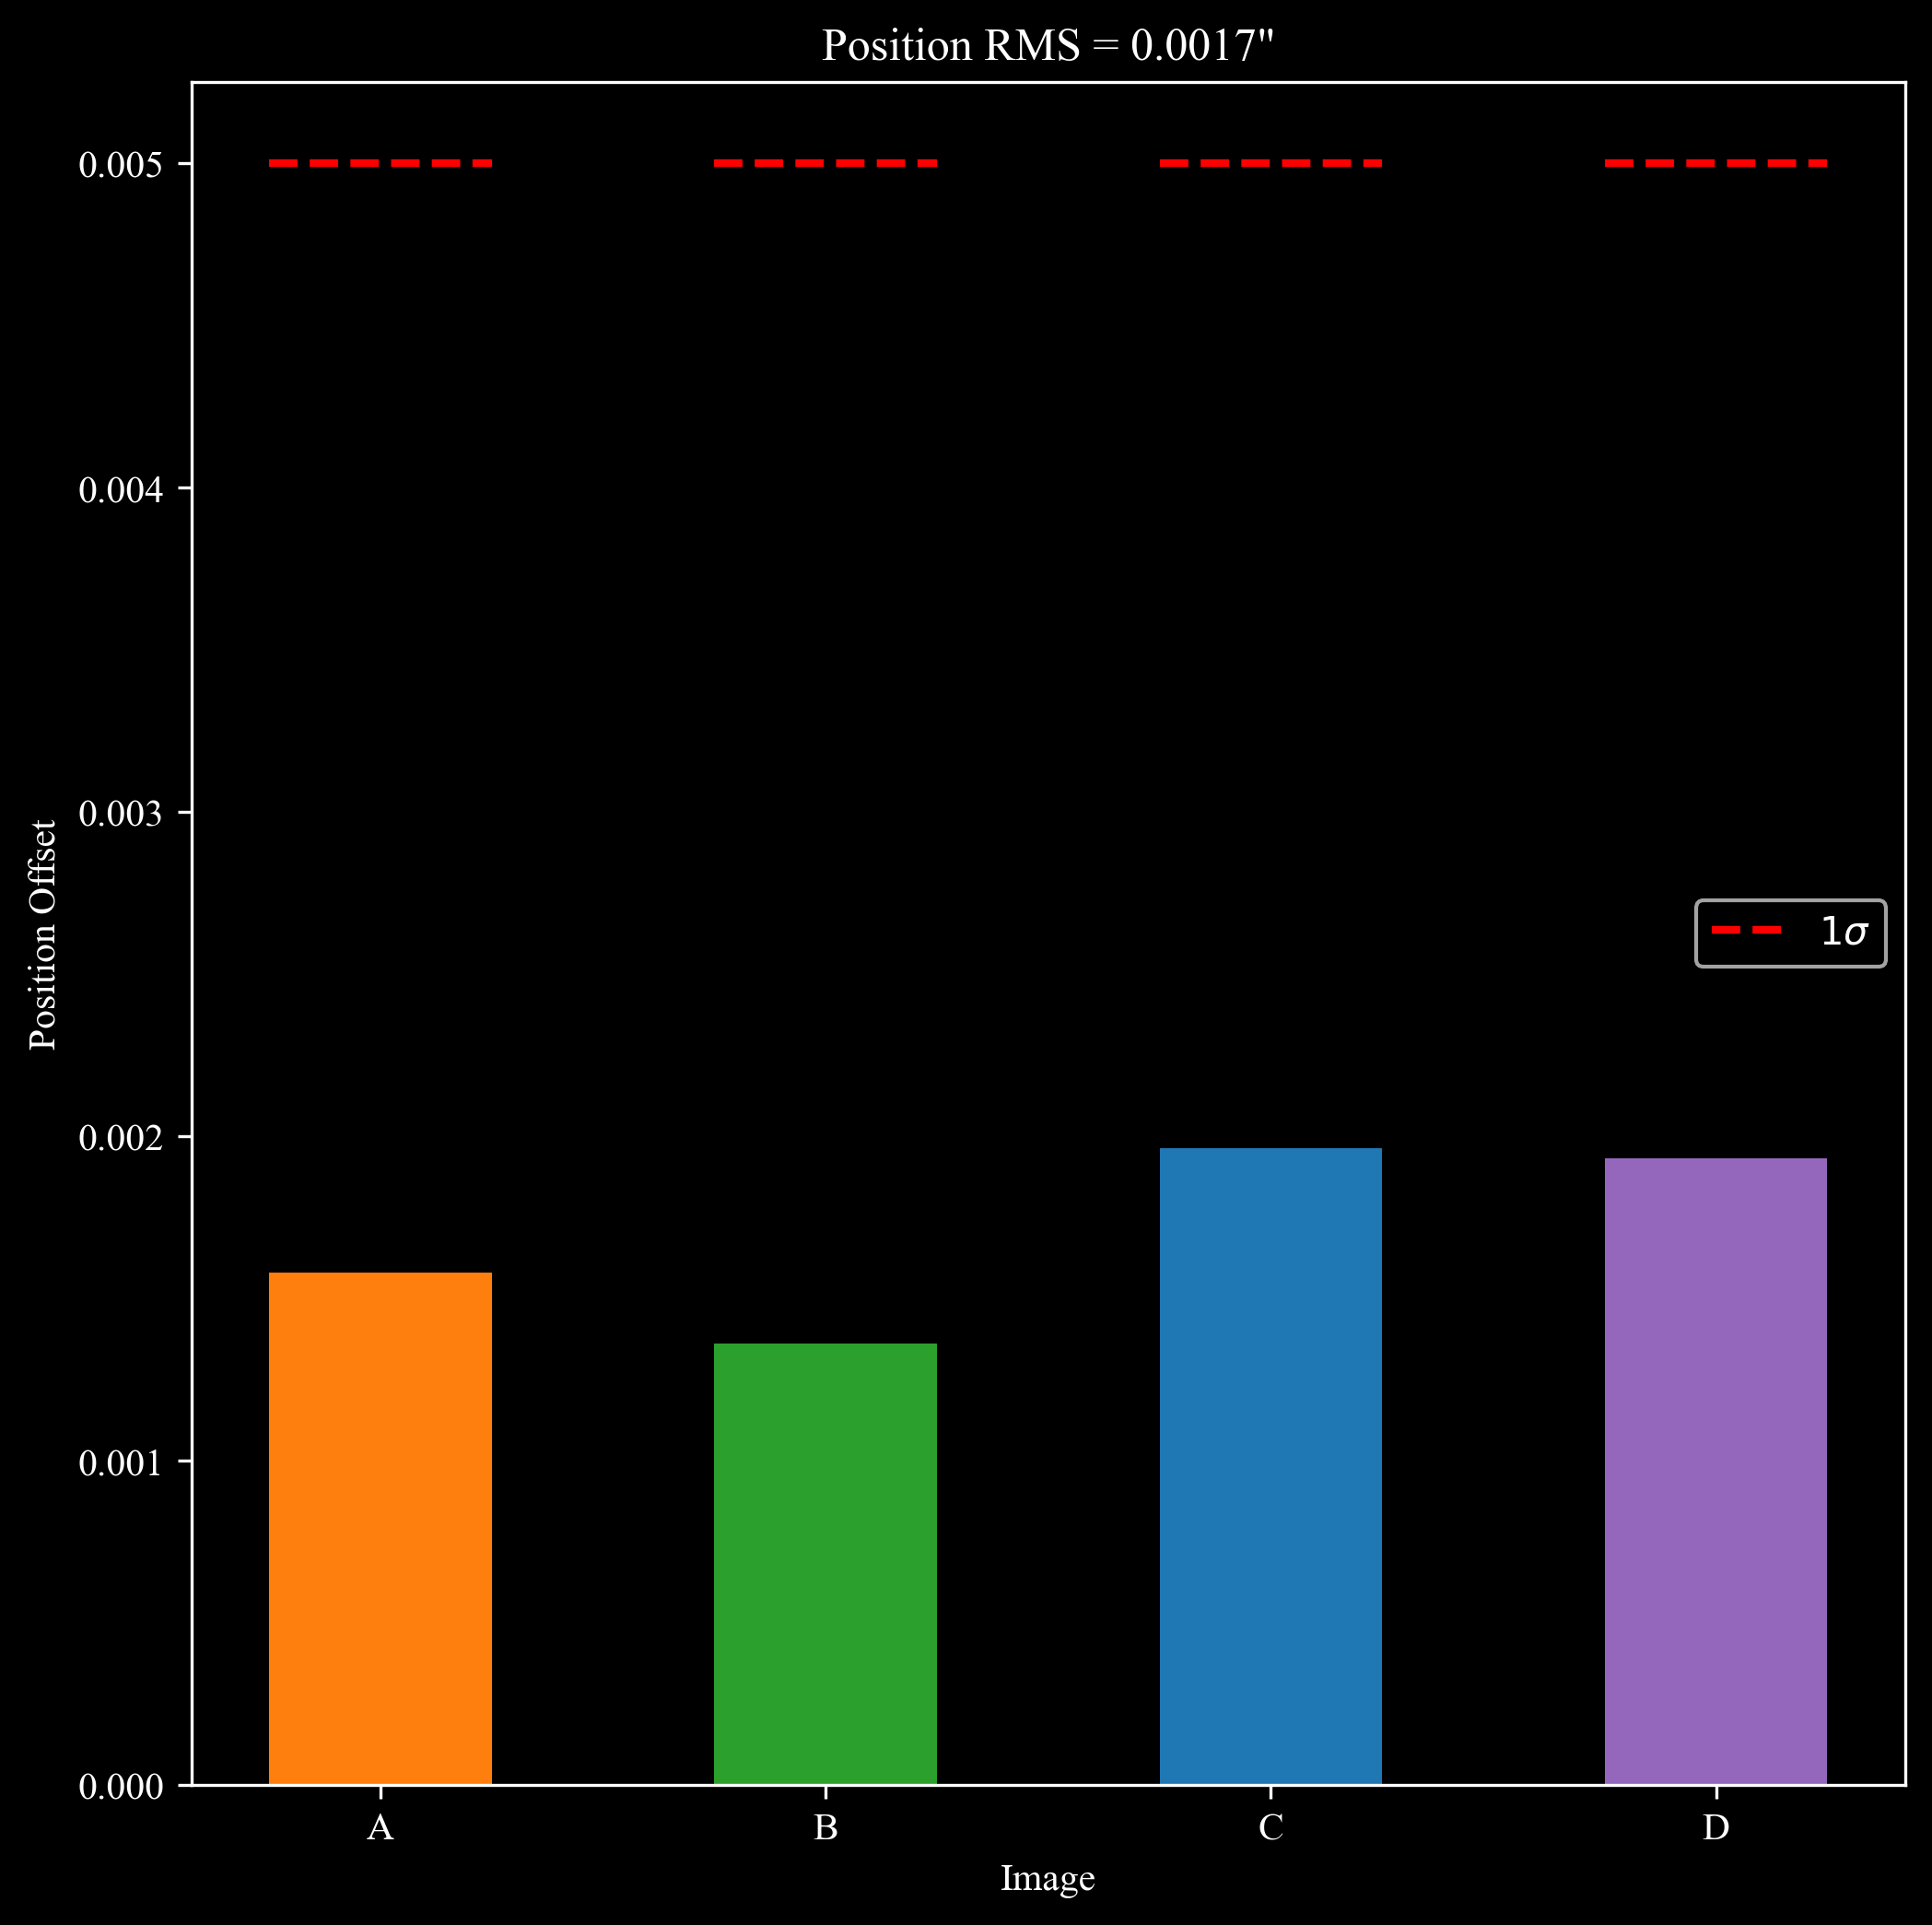

In [577]:
plotting(obs_point, pred_point, bkg='black')